In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# Q3
def eulers_method(dx_dt, y0, steps, h):
  """Compute Euler's method for a given function.

  Args:
      dx_dt: the derivative function (x, y)
      y0: starting y value
      steps: number of steps in system
      h: step size (time)
  """
  t = np.arange(0, steps*h, h)
  y = np.zeros(len(t))
  y[0] = y0
  for i in range(0, len(t)-1):
      y[i + 1] = y[i] + h*dx_dt(y[i],t[i])
  return t, y


In [6]:
# Q3
def heuns_method(dx_dt, y0, steps, h):
  """Compute Heuns's method for a given function.

  Args:
      dx_dt: the derivative function (x, y)
      y0: starting y value
      steps: number of steps in system
      h: step size (time)
  """
  t = np.arange(0, steps*h, h)
  y = np.zeros(len(t))
  y[0] = y0
  for i in range(0, len(t)-1):
    eulers = y[i] + h*dx_dt(y[i],t[i])
    y[i + 1] = y[i] + (dx_dt(y[i],t[i]) +  dx_dt(eulers, t[i + 1]))*(h/2)
  return t, y

In [7]:
# Q4
def SIS_euler(beta, h):
    gamma = 0.25
    N = 100 #population
    I0 = 10 #patient zero
    S0 = N - I0 #N is a conserved quantity
    num_steps = 50
    S = S0; I = I0;  # set initial conditions

    #  The S differential is the - number of expected infections + number of expected recoveries
    S_differential = lambda S, t: -S * beta * (N-S) + gamma * (N-S)
    #  The I differential is the + number of expected infections - number of expected recoveries
    I_differential = lambda I, t : (N-I) * beta * I - gamma * I

    # Calling Eulers, passing in our differential
    t, s = eulers_method(S_differential, S0, num_steps, h)
    # Calling Eulers, passing in our differential
    t, i = eulers_method(I_differential, I0, num_steps, h)

    return s, i, t

In [8]:
# Helper function
def make_graphs(betas, step_sizes, SIS_function, title, group_1, group_2):
    plt.rcParams["figure.figsize"] = [18, 14]
    fig, axs = plt.subplots(len(betas), len(step_sizes))
    for i, b in enumerate(betas):
        for j, step in enumerate(step_sizes):
            susceptible, infected, t = SIS_function(b, step)
            axs[i, j].plot(t, susceptible, label=group_1)
            axs[i, j].plot(t, infected, label=group_2)
            axs[i, j].set_title("Beta = "+str(b) + ", step size = " + str(step))

            if i == 0 and j == 2:
                axs[i, j].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

    fig.tight_layout()

    fig.text(0.5, 0.00025, "Time", ha='center',fontsize=14)
    fig.text(0.00025, 0.5, "Population", va='center', rotation='vertical',fontsize=14)
    plt.suptitle(title, fontsize=24 , y=1.02)
    plt.show()

/var/folders/0m/k2b7stlx4dz2pm_7rd8spx3w0000gn/T/ipykernel_34983/3668669918.py:11: RuntimeWarning: overflow encountered in double_scalars
  S_differential = lambda S, t: -S * beta * (N-S) + gamma * (N-S)
/var/folders/0m/k2b7stlx4dz2pm_7rd8spx3w0000gn/T/ipykernel_34983/3668669918.py:11: RuntimeWarning: invalid value encountered in double_scalars
  S_differential = lambda S, t: -S * beta * (N-S) + gamma * (N-S)
/var/folders/0m/k2b7stlx4dz2pm_7rd8spx3w0000gn/T/ipykernel_34983/3668669918.py:13: RuntimeWarning: overflow encountered in double_scalars
  I_differential = lambda I, t : (N-I) * beta * I - gamma * I
/var/folders/0m/k2b7stlx4dz2pm_7rd8spx3w0000gn/T/ipykernel_34983/3668669918.py:13: RuntimeWarning: invalid value encountered in double_scalars
  I_differential = lambda I, t : (N-I) * beta * I - gamma * I
/var/folders/0m/k2b7stlx4dz2pm_7rd8spx3w0000gn/T/ipykernel_34983/3668669918.py:11: RuntimeWarning: overflow encountered in double_scalars
  S_differential = lambda S, t: -S * beta * 

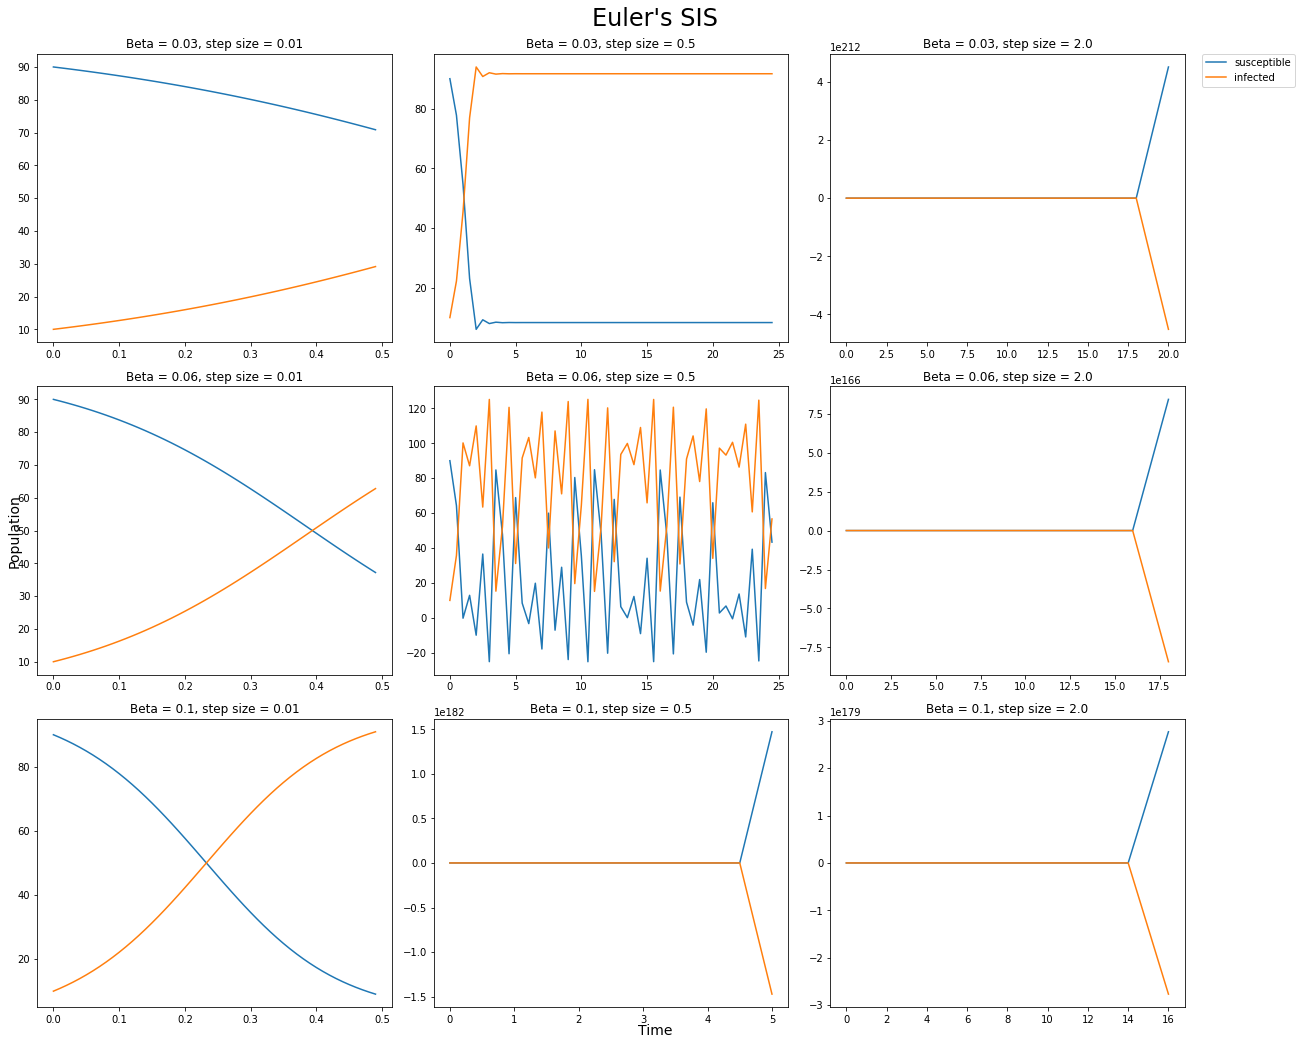

In [9]:
# EULER Q4 Graphs
betas = [0.03, 0.06, 0.1] #transmission time per contact: 30 days. contacts per day: 5
step_sizes = [0.01, 0.5, 2.0]
# s, i, t = SIS_euler(0.06, 0.5)
make_graphs(betas, step_sizes, SIS_euler, "Euler's SIS", 'susceptible', 'infected')

In [10]:
# Q4
def SIS_heun(beta, h):
    gamma = 0.25
    N = 100 #population
    I0 = 10 #patient zero
    S0 = N - I0 #N is a conserved quantity
    num_steps = 50
    S = S0; I = I0;  # set initial conditions

    #  The S differential is the - number of expected infections + number of expected recoveries
    S_differential = lambda S, t: -S * beta * (N-S) + gamma * (N-S)
    I_differential = lambda I, t : (N-I) * beta * I - gamma * I

    t, s = heuns_method(S_differential, S0, num_steps, h)
    t, i = heuns_method(I_differential, I0, num_steps, h)

    return s, i, t

/var/folders/0m/k2b7stlx4dz2pm_7rd8spx3w0000gn/T/ipykernel_34983/4219179616.py:11: RuntimeWarning: overflow encountered in double_scalars
  S_differential = lambda S, t: -S * beta * (N-S) + gamma * (N-S)
/var/folders/0m/k2b7stlx4dz2pm_7rd8spx3w0000gn/T/ipykernel_34983/4219179616.py:11: RuntimeWarning: invalid value encountered in double_scalars
  S_differential = lambda S, t: -S * beta * (N-S) + gamma * (N-S)
/var/folders/0m/k2b7stlx4dz2pm_7rd8spx3w0000gn/T/ipykernel_34983/4219179616.py:12: RuntimeWarning: overflow encountered in double_scalars
  I_differential = lambda I, t : (N-I) * beta * I - gamma * I
/var/folders/0m/k2b7stlx4dz2pm_7rd8spx3w0000gn/T/ipykernel_34983/4219179616.py:12: RuntimeWarning: invalid value encountered in double_scalars
  I_differential = lambda I, t : (N-I) * beta * I - gamma * I
/var/folders/0m/k2b7stlx4dz2pm_7rd8spx3w0000gn/T/ipykernel_34983/4219179616.py:11: RuntimeWarning: overflow encountered in double_scalars
  S_differential = lambda S, t: -S * beta * 

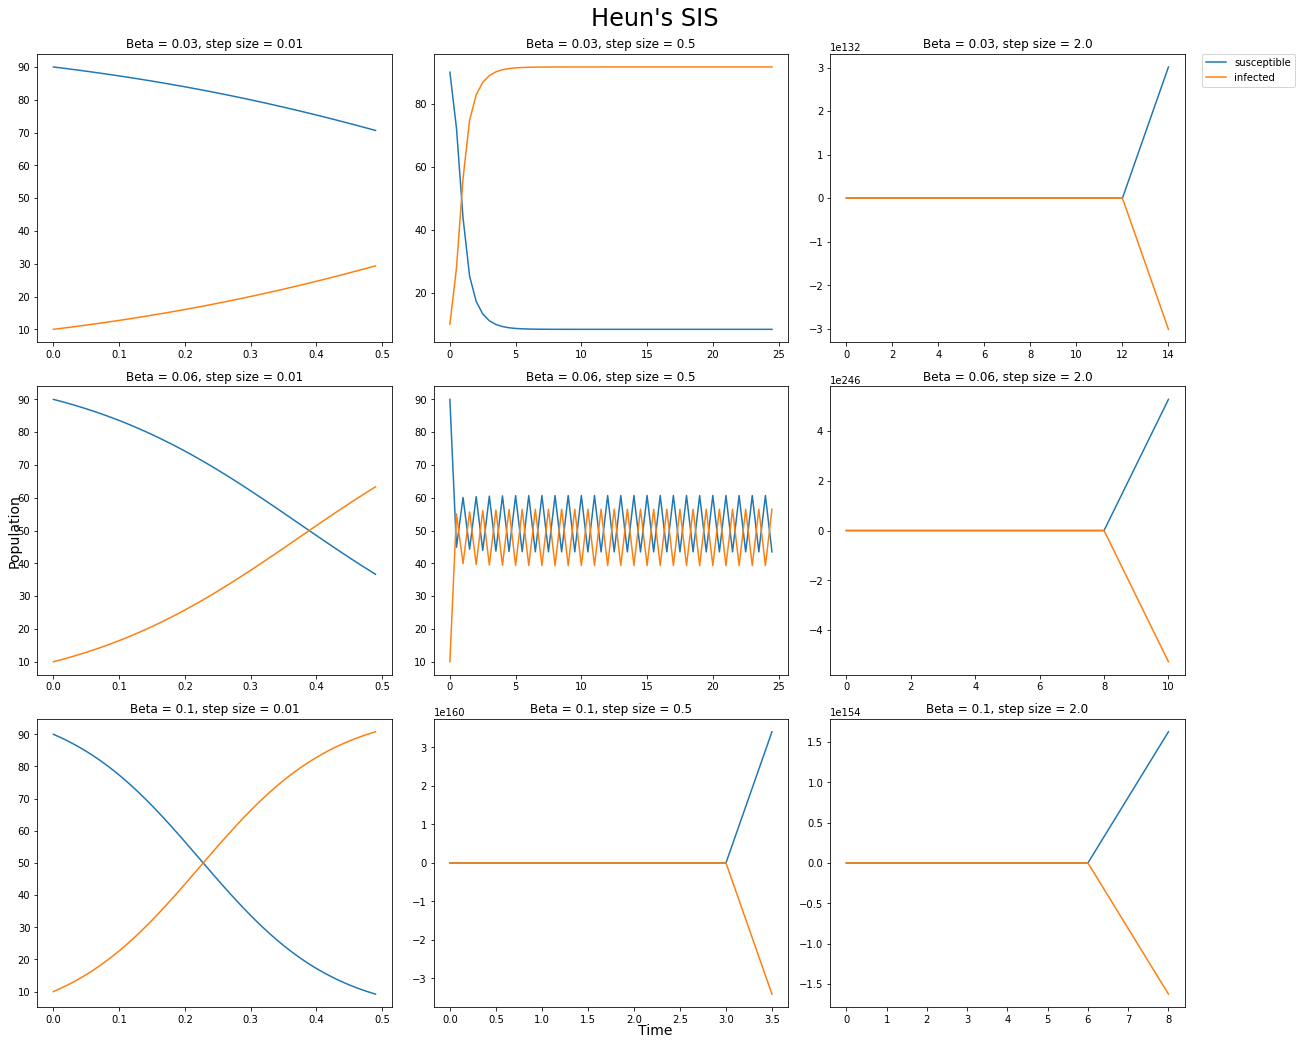

In [11]:
# Q4 results
betas = [0.03, 0.06, 0.1] #transmission time per contact: 30 days. contacts per day: 5
step_sizes = [0.01, 0.5, 2.0]
make_graphs(betas, step_sizes, SIS_heun, "Heun's SIS", 'susceptible', 'infected')

In [24]:
# Q7
# TODO: Try using inspiration from SIS
def HUN_model(beta, gamma, alpha, sigma):
    h = 0.001
    pop = 100 #population
    H0 = 40 #vaccine hesitant people
    N0 = 40#non-vaccine hesitant people
    U0 = 20 #people who are unsure
    num_steps = 20
    H = H0; N = N0; U = U0;  # set initial conditions
    # arrays for results

    T = np.arange(num_steps/h);
    # H_res = np.zeros(len()); N_res = np.zeros(len(t)); U_res = np.zeros(len(t));
    res = []


    #  The S differential is the - number of expected infections + number of expected recoveries
    N_differential = lambda H, N, U  : beta*N*U - gamma*N*H
    H_differential = lambda H, N, U  : alpha*H*pop-N-H - sigma*H*N
    U_differential = lambda H, N, U  : gamma*N*H + sigma*H*N - beta*N*U - alpha*H*U
    # We don't need to define the differential for U as it is equal to -(N_differential + H_differential)

    # H_res[0] = H0
    # N_res[0] = N0
    # U_res[0] = U0
    for i in range(len(T)):
        N_delta= h*N_differential(H, N, U)
        H_delta =  h*H_differential(H, N, U)
        U_delta = - N_delta - H_delta
        N += N_delta
        H += H_delta
        U += U_delta
        res.append((N,H,U))

    Nt,Ht,Ut = map(np.array, zip(*res))
    return Nt,Ht,Ut

Text(0.5, 1.02, 'HUN Model for Vaccine Hesitancy')

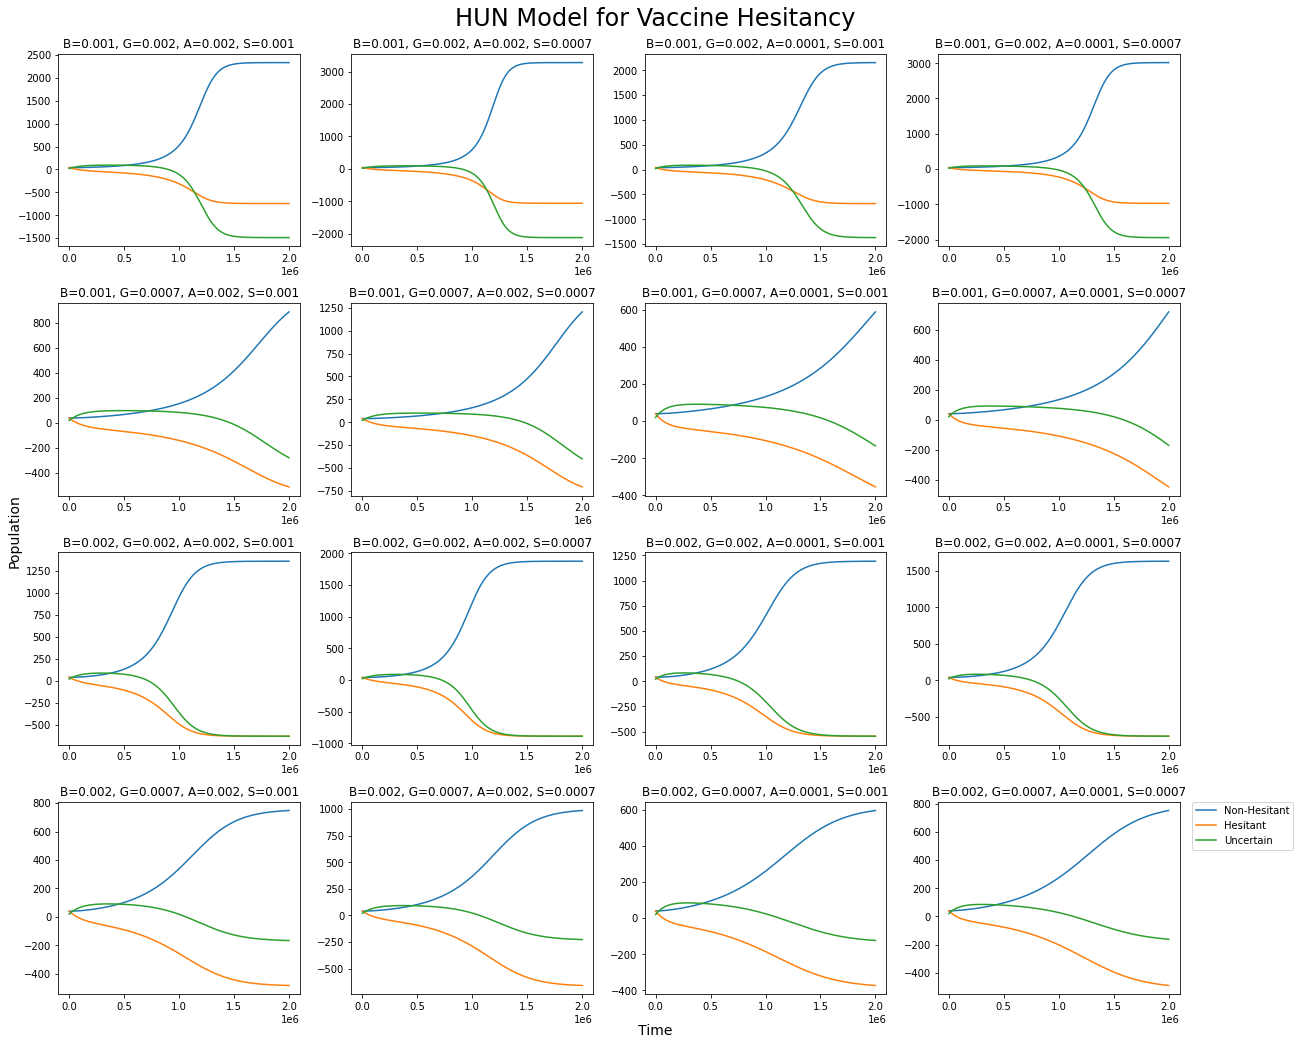

In [25]:
# Graphing of Q7
beta = [0.001, 0.002]
gamma = [0.002, 0.0007]
alpha = [0.002, 0.0001]
sigma = [0.001, 0.0007]
plt.rcParams["figure.figsize"] = [18, 14]
fig, axs = plt.subplots(4, 4)
row = 0
col = 0
for b in beta:
    for g in gamma:
        for a in alpha:
            for s in sigma:
                N, H, U = HUN_model(b, g, a, s)
                axs[row, col].plot(N, label="Non-Hesitant")
                axs[row, col].plot(H, label="Hesitant")
                axs[row, col].plot(U, label="Uncertain")

                axs[row, col].set_title("B="+str(b) + ", G=" + str(g) + ", A=" + str(a) + ", S=" + str(s))

                if col == 3:
                    row += 1
                    col = 0
                else:
                    col += 1

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

fig.tight_layout()

fig.text(0.5, 0.00025, "Time", ha='center',fontsize=14)
fig.text(0.00025, 0.5, "Population", va='center', rotation='vertical',fontsize=14)
plt.suptitle("HUN Model for Vaccine Hesitancy", fontsize=24 , y=1.02)
